In [2]:
!pip install  keras-cv
!pip install  keras

In [4]:
import keras_cv
import numpy as np
import keras

In [5]:
classifier=keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet_classifier")

100%|██████████| 2.80k/2.80k [00:00<00:00, 7.56MB/s]
100%|██████████| 28.0M/28.0M [00:00<00:00, 29.8MB/s]


In [6]:
cd /content/images_for_detection

/content/images_for_detection


In [7]:
!ls

IMG-20190306-WA0035.jpg  IMG_20201017_204138.jpg  vishwam_and_kuhu_in_32.jpg
IMG_20201008_020314.jpg  IMG_20201025_081106.jpg  vishwam_in_park.jpg


In [70]:
#Loading Images
image=keras.utils.load_img('/content/a-freightliner-truck.jpg')
image=np.array(image)
h,w,c=image.shape
image_batch=image.reshape((1,h,w,c))


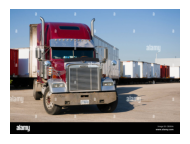

In [71]:
keras_cv.visualization.plot_image_gallery(image_batch,value_range=(0,255),rows=1,cols=1,show=True)

In [72]:
#getting predictions
probs=classifier.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


In [73]:
top_classes=probs[0].argsort(axis=-1)

In [74]:
#mapping classes to class names in imagenet dataset
import json
classes = keras.utils.get_file(
    origin="https://gist.githubusercontent.com/LukeWood/62eebcd5c5c4a4d0e0b7845780f76d55/raw/fde63e5e4c09e2fa0a3436680f436bdcb8325aac/ImagenetClassnames.json"
)
with open(classes, "rb") as f:
    classes = json.load(f)

In [75]:
top_two = [classes[str(i)] for i in top_classes[-2:]]
print("Top two classes are:", top_two)

Top two classes are: ['freight car', 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi']
